In [1]:
import pandas as pd
from helper_functions import run_experiments
# Загружаем данные из формата parquet
X_train = pd.read_parquet('data/X_train.parquet')
X_test = pd.read_parquet('data/X_test.parquet')
y_train = pd.read_parquet('data/y_train.parquet')
y_test = pd.read_parquet('data/y_test.parquet')


C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [4]:
output_activation='sigmoid'
loss_metric='binary_crossentropy'
monitor_metric='val_loss'
neurons_list = [[512,512,512]]
epochs = [105]
batch_size = [8]
validation_split = 0.1
optimizer = ['adam']
activation = ['relu']
l2 = 0.1
patience = 10
learning_rate=0
dropout = 0.1

Epoch 1/105
111/111 [==============================] - 4s 25ms/step - loss: 16636171.0000 - accuracy: 0.5102 - val_loss: 6675243.5000 - val_accuracy: 0.5053
Epoch 2/105
111/111 [==============================] - 2s 21ms/step - loss: 5563881.5000 - accuracy: 0.5136 - val_loss: 1775911.1250 - val_accuracy: 0.5794
Epoch 3/105
111/111 [==============================] - 1s 9ms/step - loss: 3828532.5000 - accuracy: 0.4977 - val_loss: 3092317.7500 - val_accuracy: 0.5370
Epoch 4/105
111/111 [==============================] - 2s 19ms/step - loss: 1382246.7500 - accuracy: 0.5170 - val_loss: 805137.6250 - val_accuracy: 0.5159
Epoch 5/105
111/111 [==============================] - 2s 19ms/step - loss: 634288.3750 - accuracy: 0.5374 - val_loss: 230423.1562 - val_accuracy: 0.5000
Epoch 6/105
111/111 [==============================] - 2s 20ms/step - loss: 317089.6562 - accuracy: 0.4977 - val_loss: 19484.3203 - val_accuracy: 0.4921
Epoch 7/105
111/111 [==============================] - 1s 8ms/step - l

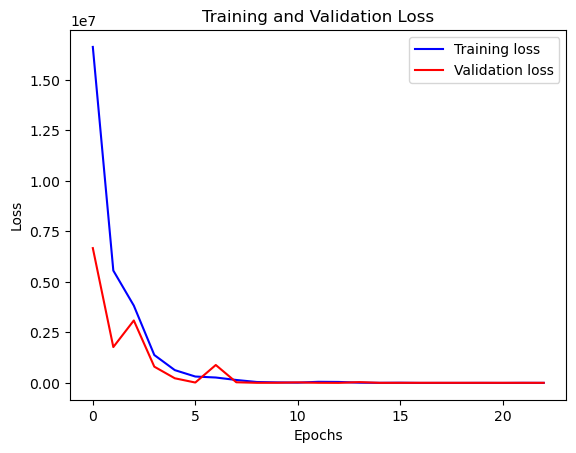

48/48 [==============================] - 0s 2ms/step
Accuracy on validation data: 0.5079365079365079
Precision on validation data: 0.5040871934604905
Recall on validation data: 0.9788359788359788
F1 Score on validation data: 0.6654676258992805


In [5]:
new_results_df,model = run_experiments(neurons_list, X_train, y_train, X_test, y_test, epochs, batch_size, validation_split, optimizer, activation, l2, patience, learning_rate, dropout,output_activation,loss_metric,monitor_metric) # Сама функция нейросети

In [4]:
results_all = pd.read_csv('data/models/results_all.csv')
results_all

,"[64, 32, 32]",3,10107106.0,3404044.25,adam,relu,5,64,0.1,0.5264550264550265,0.5,0.8435754189944135,0.6278586278586279,0.1.1
0,"[64, 32, 32]",3,22956280.0,10393238.00,adam,relu,5,64,0.1,0.558201,0.551887,0.619048,0.583541,0.1
1,"[256, 256, 256]",3,5284829.0,3369182.75,adam,relu,5,16,0.1,0.571429,0.562212,0.645503,0.600985,0.1


In [5]:
# # Make predictions for all the data
all_data_predictions = model.predict(X_train)

# Create a new DataFrame to store the actual and predicted values
# Create a new DataFrame to store the actual and predicted values
# Create a new DataFrame to store the actual and predicted values
predictions_df = pd.DataFrame({'Actual': y_train['Категориальная переменная'].values.flatten(), 'Predicted': all_data_predictions.flatten()})

# Print the DataFrame
predictions_df

28/28 [==============================] - 0s 3ms/step


,Actual,Predicted
0,False,0.0
1,False,1.0
2,True,1.0
3,True,1.0
4,True,1.0
...,...,...
877,True,1.0
878,False,1.0
879,False,0.0
880,True,0.0
